#  Assignment-05-Multilinear_Regression_Q2



# Q.2
Prepare a prediction model for profit of 50_startups data.<br/>
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.<br/>

R&D Spend -- Research and devolop spend in the past few years<br/>
Administration -- spend on administration in the past few years<br/>
Marketing Spend -- spend on Marketing in the past few years<br/>
State -- states from which data is collected<br/>
Profit  -- profit of each state in the past few years<br/>

## Import Libraries

In [1]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Multi Linear Regression\\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data = data[["R&D Spend","Administration","Marketing Spend","State","Profit"]]
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Check for null values


In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Inference:<br/>
The given table as zero non null values hence value imputation is not required**

### RENAME

In [7]:
data1=data.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MKS'},axis=1)
data1.head()

,RDS,Admin,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Duplicate column

In [8]:
data1[data1.duplicated()]

,RDS,Admin,MKS,State,Profit


**Inference<br/>
No Duplicate column**

## Correlation Analysis

In [9]:
data1.corr()

,RDS,Admin,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**Inference**<br/>
-> RDS has strongest +ve corr with Profit i.e if RDS value increase then Price will increase<br/>
-> MKS has strongest +ve corr with Profit i.e if MKS value increase then Price will increase<br/>
-> Admin and Profit has weak +ve correlation

-> RDS has strong +ve corr with MKS i.e if Age value increase then Price will increase<br/>
-> Admin and MKS has weak -ve correlation

->  Admin and RDS has strong +ve correlation<br/>


## Scatterplot between variables along with histograms


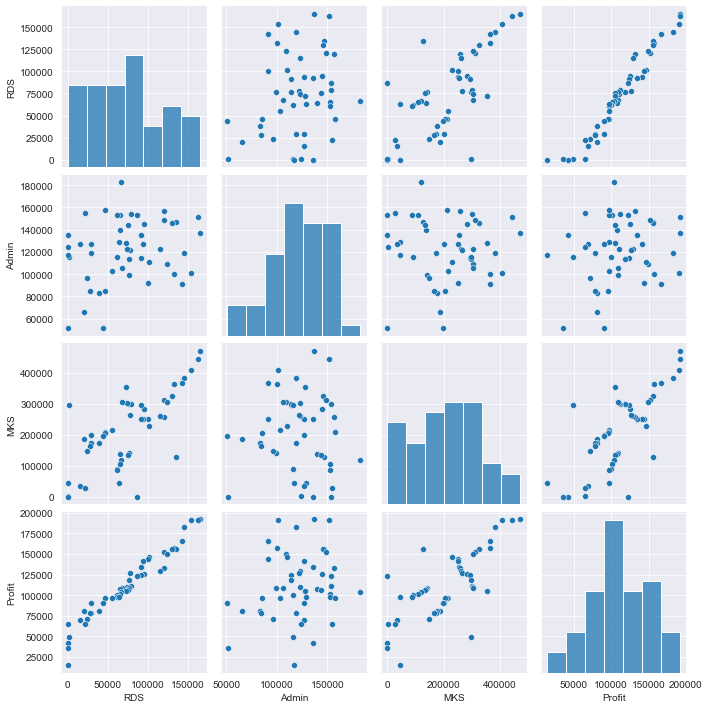

In [10]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RDS', ylabel='Density'>

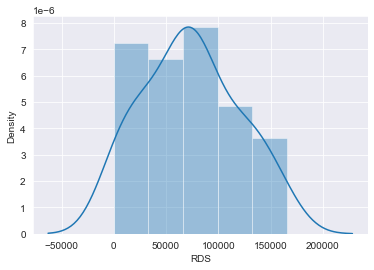

In [11]:
#Visualization of data
import seaborn as sns
sns.distplot(data1['RDS'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Admin', ylabel='Density'>

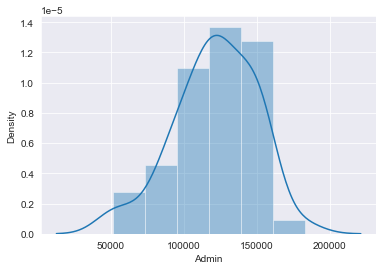

In [12]:
sns.distplot(data1['Admin'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MKS', ylabel='Density'>

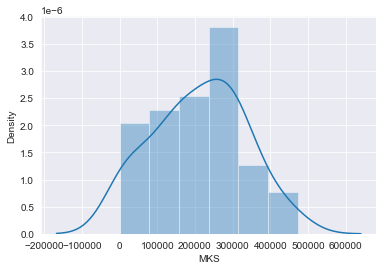

In [13]:
sns.distplot(data1['MKS'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

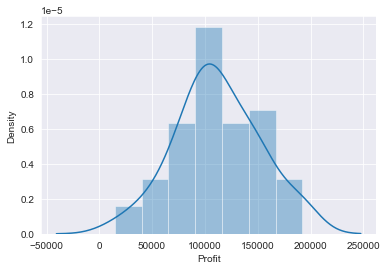

In [14]:
sns.distplot(data1['Profit'])

# Preparing a model


In [15]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDS+Admin+MKS',data=data1).fit()

## Model Testing

In [16]:
model.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MKS              0.027228
dtype: float64

**Inference**<br/>
<br/>
**To interpret Beta coefficient <br/>**

Y=Profit & X=RDS,Admin,MKS<br/>

->Admin- per unit increase in Admin the Price will decrease by -0.026816<br/>

->RDS - per unit increase in RDS the Price will increase by 0.805715<br/>
->MKS- per unit increase in MKS the Price will increase by 0.027228<br/>



## T-value & P-value

In [17]:
print(np.round(model.pvalues,5), '\n', np.round(model.tvalues,5))

Intercept    0.00000
RDS          0.00000
Admin        0.60176
MKS          0.10472
dtype: float64 
 Intercept     7.62622
RDS          17.84637
Admin        -0.52551
MKS           1.65508
dtype: float64


**Inference<br/>
P-value<br/>
-> if p value<0.05 -> significant<br/>
-> if p value>0.05 -> insignificant<br/>**
<br/>
-> Admin has p-val =0.60176 >0.05 which is highly insignificant and least impactful <br/>
-> MKS has p-val =0.10472 >0.05 which is insignificant and least impactful <br/>

-> RDS has p-value <0.05 which is significant<br/>
<br/>
(Admin,MKS) ------> INSIGNIFICANT <br/>
(RDS)------> SIGNIFICANT

In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)# Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

## Simple Linear Regression Models


**Build SLR and MLR models for insignificant variables 'Admin' and 'MKS'<br/>
Also finding their tvalues and pvalues**

**SLR FOR Admin**

In [19]:
slr_a=smf.ols('Profit~Admin',data = data1).fit() #Simple lR for each variables
#t and p-Values
print(slr_a.pvalues, '\n', slr_a.tvalues)

Intercept    0.003824
Admin        0.162217
dtype: float64 
 Intercept    3.040044
Admin        1.419493
dtype: float64


**Inference:<br/>
Admin has insignificant pvalue  0.16222>0.05**


**SLR FOR MKS**

In [20]:
slr_m=smf.ols('Profit~MKS',data = data1).fit() #Simple lR for each variables
#t and p-Values
print(slr_m.pvalues, '\n', slr_m.tvalues)

Intercept    4.294735e-10
MKS          4.381073e-10
dtype: float64 
 Intercept    7.808356
MKS          7.802657
dtype: float64


**Inference:<br/>
MKS has significant pvalue**


**SLR FOR Admin & MKS**

In [21]:
ml_am=smf.ols('Profit~Admin+MKS',data = data1).fit() 
#t and p-Values
print(ml_am.pvalues, '\n', ml_am.tvalues) #result are significant

Intercept    2.589341e-01
Admin        1.729198e-02
MKS          9.727245e-11
dtype: float64 
 Intercept    1.142741
Admin        2.467779
MKS          8.281039
dtype: float64


In [22]:
ml_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           2.50e-10
Time:                        22:41:48   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
MKS            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Validation factor:Calculating VIF (Variance Inflation Factor)

### (1) Collinearity Problem Check


In [23]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~Admin+MKS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Admin~RDS+MKS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKS~RDS+Admin",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','Admin','MKS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,Admin,1.175091
2,MKS,2.326773


**Inference<br/>
None variable has VIF>20, No Collinearity, so consider all variables in Regression equation**


### (2)Residual Analysis

#### Test for Normality of Residuals (Q-Q Plot)

In [24]:
model.resid #Errors

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


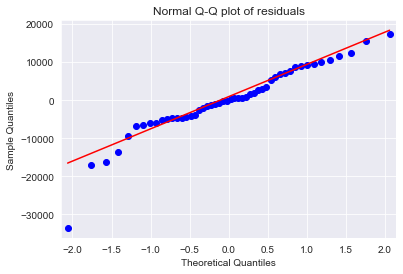

In [25]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [26]:
list(np.where(model.resid>15000))# outlier detection from above QQ plot of residuals

[array([36, 45], dtype=int64)]

In [27]:
list(np.where(model.resid<-30000))# outlier detection below -6000

[array([49], dtype=int64)]

In [28]:
data1['Predicted']= model.fittedvalues  #Predicted Value
data1['Error']= model.resid             #Errors
data1

,RDS,Admin,MKS,State,Profit,Predicted,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


## Boxplot

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Error'>

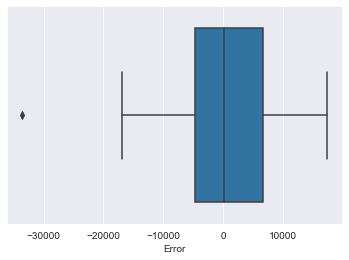

In [29]:
sns.boxplot(data1['Error'])

## Histogram

<AxesSubplot:xlabel='Error', ylabel='Count'>

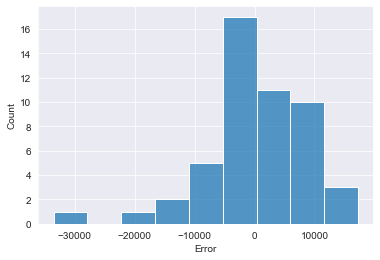

In [32]:
sns.histplot(data1['Error'])

## Residual Plot for Homoscedasticity

In [33]:
#Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [34]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

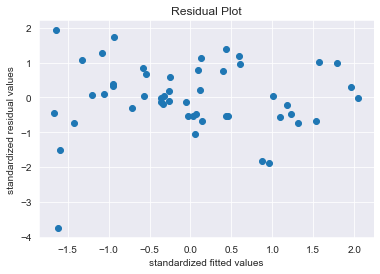

In [35]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In the above scatter plot of fitted and residual values <br/>
-->no pattern
-->0 correlation
Same is the case here, hence it is a good model.

## Residual Vs Regressors

In [36]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)  
# exog = x-variable & endog = y-variable

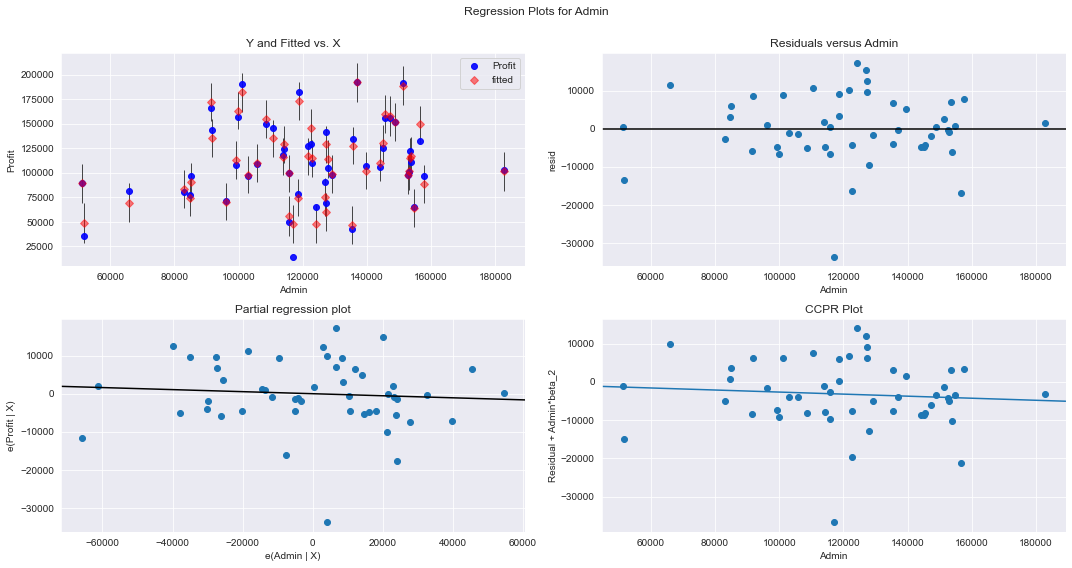

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Admin', fig=fig)
plt.show()

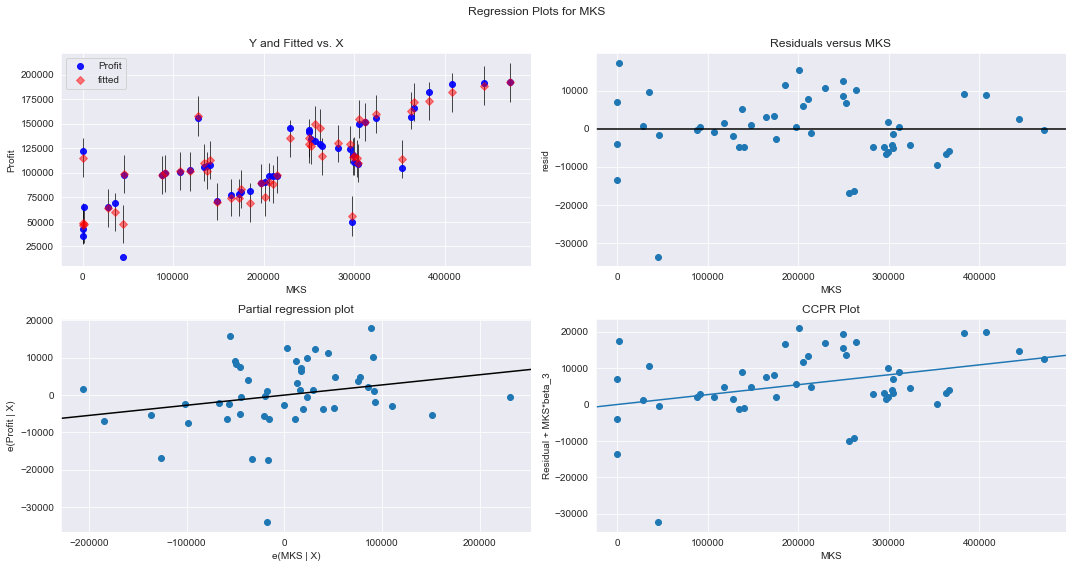

In [38]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'MKS', fig=fig)
plt.show()

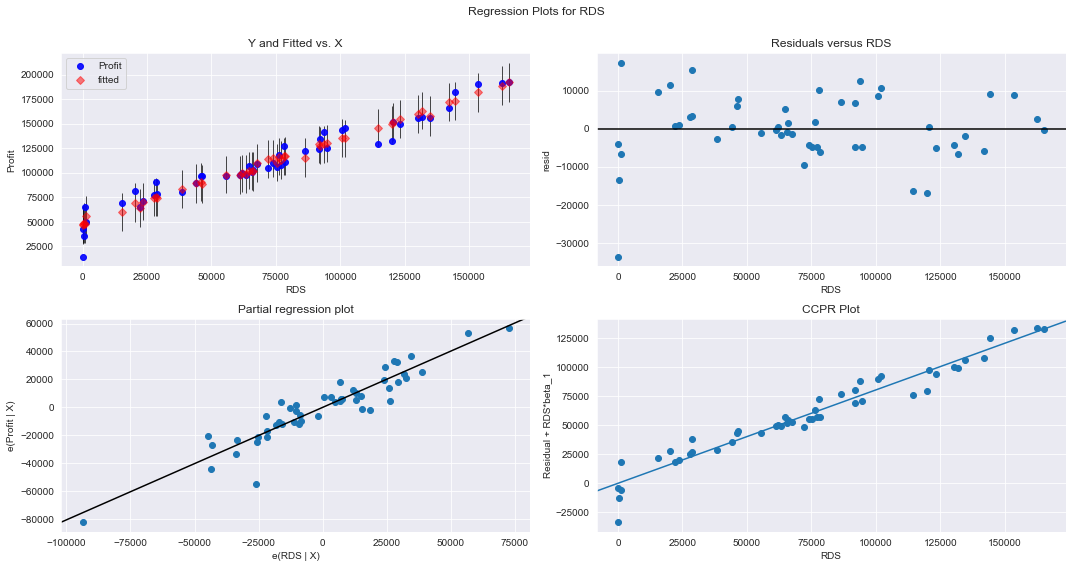

In [39]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'RDS', fig=fig)
plt.show()

## Model Deletion Diagnostics (Detecting Influencers/Outliers)

### (1) Cook's Distance: <br/>
If Cook's distance > 1, then it's an outlier

In [40]:
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

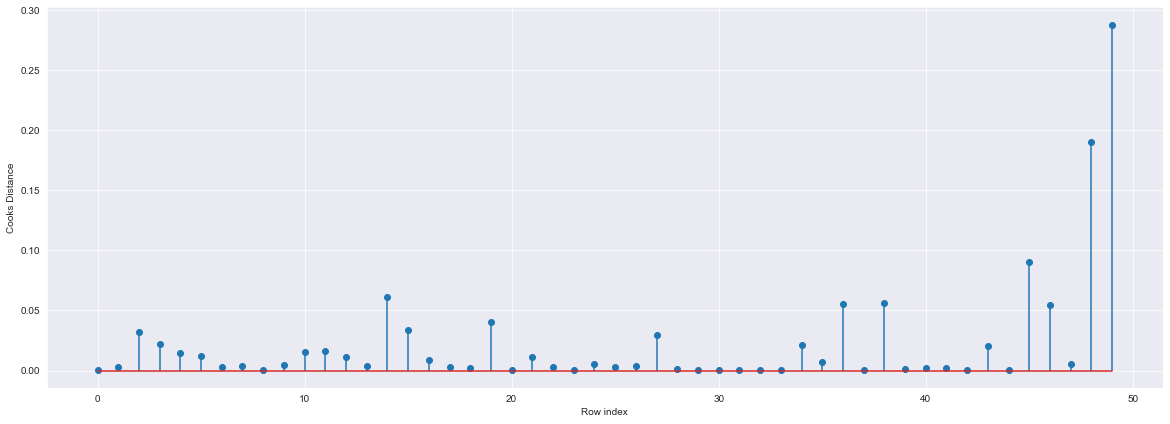

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543263)

## High Influence points <br/>
Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers


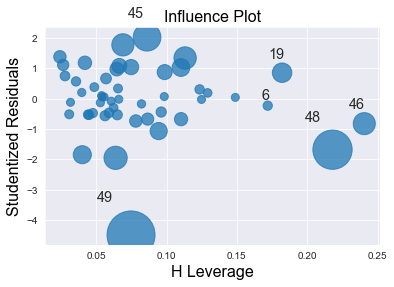

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.48

In [45]:
#From the above plot, it is evident that data point 80 is the influencers , as it is crossing 0.36 point in influence plot

In [46]:
data1[data1.index.isin([49])]

,RDS,Admin,MKS,State,Profit,Predicted,Error
49,0.0,116983.8,45173.06,California,14681.4,48215.134111,-33533.734111


## Improving the model

In [47]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,Admin,MKS,State,Profit,Predicted,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


## Model Deletion Diagnostics and Final Model


In [48]:
model2=smf.ols("Profit~RDS+Admin+MKS",data=data2).fit()

In [49]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+Admin+MKS",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~RDS+Admin+MKS",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779906
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090915
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.98771919355472
Thus model accuracy is improved 

In [50]:
final_model.rsquared

0.9882757054424702

## Model Predictions


In [51]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':65000,"Admin":80000,"MKS":125000},index=[0])
new_data

,RDS,Admin,MKS
0,65000,80000,125000


In [52]:
# Manual Prediction of Price
final_model.predict(new_data)

0    100425.992609
dtype: float64

In [53]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [54]:
d_fin={'Prep_Models':['Model', 'Final_Model'], 'Rsquared':[model.rsquared, final_model.rsquared]}
table=pd.DataFrame(d_fin)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


## Table containing R^2 value for each prepared model

In [55]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


# END 